## Implementing linear regression with one variable to predict profits for a restaurant franchise

## 1 -  Problem Statement

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.
- You would like to expand your business to cities that may give your restaurant higher profits.
- The chain already has restaurants in various cities and you have data for profits and populations from the cities.
- You also have data on cities that are candidates for a new restaurant. 
    - For these cities, you have the city population.
    
Can you use the data to help you identify which cities may potentially give your business higher profits?

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd


%matplotlib inline

In [18]:
df=pd.read_csv("data/ex1data1.txt",header=None)

In [19]:
x_train=df.iloc[:,0]
y_train=df.iloc[:,1]
print(df.head(3))

        0        1
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620


In [46]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print(x_train.shape[0])
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (97,)
The shape of y_train is:  (97,)
97
Number of training examples (m): 97


`x_train` is a numpy array that contains decimal values that are all greater than zero.
- These values represent the city population times 10,000
- For example, 6.1101 means that the population for that city is 61,101

Similarly, `y_train` is a numpy array that has decimal values, some negative, some positive.
- These represent your restaurant's average monthly profits in each city, in units of \$10,000.
  - For example, 17.592 represents \$175,920 in average monthly profits for that city.
  - -2.6807 represents -\$26,807 in average monthly loss for that city.

#### Visualizing your data by plotting a scatter plot


Text(0, 0.5, 'Profit in $10,000')

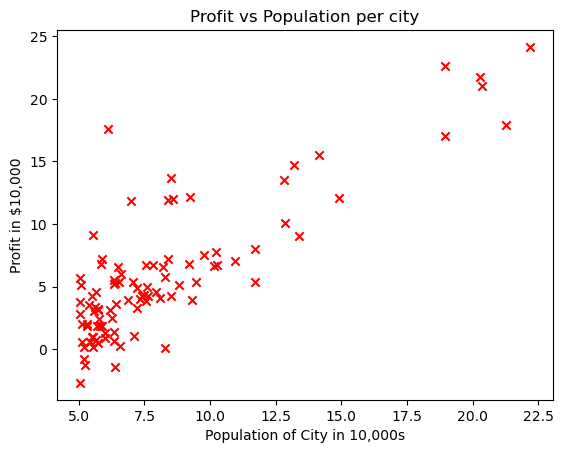

In [28]:
plt.scatter(x_train,y_train,c='r',marker="x")
plt.title("Profit vs Population per city")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000")

In [56]:
#defining our cost function
def compute_cost(x,y,w,b):
    m=x.shape[0]
    
    cost=0
    total_cost=0
    for i in range(m):
        f_wb=w*x[i]+b
        cost+=(f_wb-y[i])**2
    total_cost=cost/(2*m)
    return total_cost
        
        

In [60]:
w_init=2
b_init=1
cost=compute_cost(x_train,y_train,w_init,b_init)
print(type(cost))
print(cost)

<class 'numpy.float64'>
75.20338497891959


# Now let's implement Gradient Descent 

 steps involved
 1.no of examples define
2.initaise dj_dw,dj_db
3.calculate dj_dw,dj_db
4.update w ,b
5.return updated values of w,b


In [61]:
def compute_gradient(x,y,w,b):
    m=x.shape[0]
    dj_dw=0
    dj_db=0
    for i in range(m):
        f_wb=w*x[i]+b
        dj_dw+=(f_wb-y[i])*x[i]
        dj_db+=(f_wb-y[i])
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_dw,dj_db
        
        

In [62]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639


In [63]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114435 -4.007175051546391


In [65]:
# Implementing Batch Gradient Descent
def gradient_descent(x,y,w,b,cost_function,gradient_compute,alpha,num_iters):
    m=len(x) #number of training egs
    J_history=[]
    w = copy.deepcopy(w_init)  #avoid modifying global w within function
    w_history=[]
    b=b_init
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_dw,dj_db=compute_gradient(x,y,w,b)
        # Update Parameters using w, b, alpha and gradient
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing
        
        
    
    
    


In [66]:
initial_w = 0.
initial_b = 0.
# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     8.71   
Iteration  150: Cost     5.68   
Iteration  300: Cost     5.18   
Iteration  450: Cost     4.88   
Iteration  600: Cost     4.71   
Iteration  750: Cost     4.61   
Iteration  900: Cost     4.56   
Iteration 1050: Cost     4.52   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.161054981171953 -3.577461214180215


In [67]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Population of City in 10,000s')

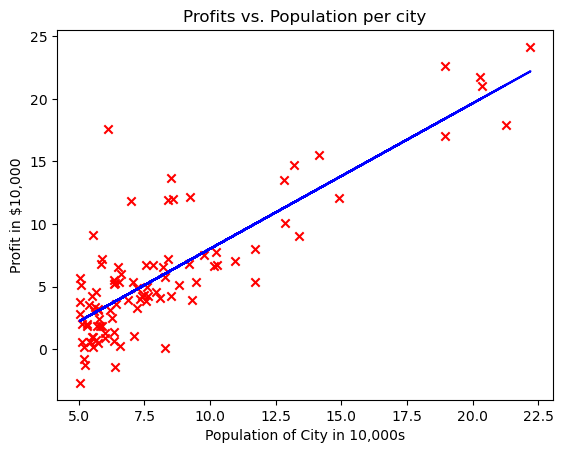

In [68]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

The final values of $w,b$ can now be used to make predictions on profits. Let's predict what the profit would be in areas of 35,000 and 70,000 people. 

- The model takes in population of a city in 10,000s as input. 

- Therefore, 35,000 people can be translated into an input to the model as `np.array([3.5])`

- Similarly, 70,000 people can be translated into an input to the model as `np.array([7.])`


In [69]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4862.31
For population = 70,000, we predict a profit of $45499.24
